# Timeseries

First you have to import the meteomatics module and the datetime module

In [58]:
import datetime as dt
import meteomatics.api as api

from __future__ import print_function

In [59]:
# Opening JSON file with my credentials
import json

creds = open('mycredentials.json')
creds = json.load(creds)
username = creds["username"]
password = creds["password"]

Input here a startdate, an enddate and the time interval, all as datetime-objects. The interval tells you, if you get the data in hourly steps, daily steps or every five minutes in between the startdate and the enddate.

In [60]:
now = dt.datetime.utcnow().replace(day=20, month=10, hour=8, minute=0, second=0, microsecond=0)
startdate_ts = now
enddate_ts = startdate_ts + dt.timedelta(hours=8)
interval_ts = dt.timedelta(minutes=10)

Put the coordinates you want to get as tuples (north/east) in a list. If you want to get coordinates in the south or in the west, just write a minus in front of the number.

In [61]:
coordinates_ts = [(47.11738000730063, 9.187666540942423)]

Choose the parameters you want to get and write them in the list. Check here which parameters are available: https://www.meteomatics.com/en/api/available-parameters/

In [62]:
parameters_ts = ['t_2m:C', 'wind_speed_10m:ms']

In the following, the request will start. If there is an error in the request as for example a wrong parameter or a date that doesn't exist, you get a message.

In [63]:
model="Mix"

In [64]:
print("time series:")
try:
    df_ts = api.query_time_series(coordinates_ts, startdate_ts, enddate_ts, interval_ts,
                                  parameters_ts, username, password, model)
    print (df_ts.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

time series:
                                             t_2m:C  wind_speed_10m:ms
lat      lon      validdate                                           
47.11738 9.187667 2022-10-20 08:00:00+00:00    14.1                9.8
                  2022-10-20 08:10:00+00:00    14.2                9.8
                  2022-10-20 08:20:00+00:00    14.2                9.8
                  2022-10-20 08:30:00+00:00    14.7                9.0
                  2022-10-20 08:40:00+00:00    15.2                8.2


In [65]:
import matplotlib.pyplot as plt

Unterterzen [(47.11738000730063, 9.187666540942423)]


<AxesSubplot: xlabel='validdate'>

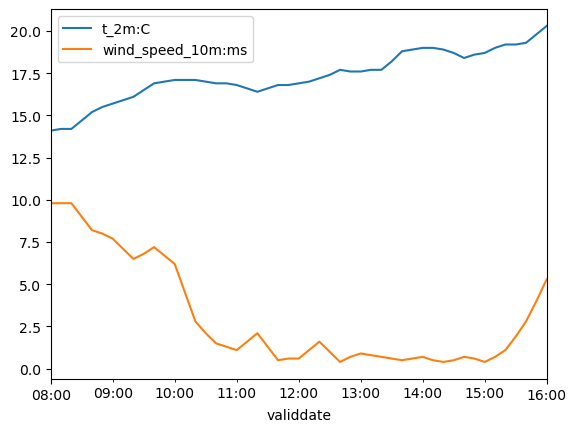

In [66]:
print("Unterterzen",coordinates_ts)
df_ts.reset_index().plot(x="validdate", y=["t_2m:C","wind_speed_10m:ms"])

In [67]:
coordinates_ts = [(47.11727152727311, 9.187783959926662)]

In [68]:
print("time series:")
try:
    df_ts = api.query_time_series(coordinates_ts, startdate_ts, enddate_ts, interval_ts,
                                  parameters_ts, username, password)
    print (df_ts.head())
except Exception as e:
    print("Failed, the exception is {}".format(e))

time series:
                                              t_2m:C  wind_speed_10m:ms
lat       lon      validdate                                           
47.117272 9.187784 2022-10-20 08:00:00+00:00    14.1                9.7
                   2022-10-20 08:10:00+00:00    14.1                9.7
                   2022-10-20 08:20:00+00:00    14.2                9.7
                   2022-10-20 08:30:00+00:00    14.7                8.9
                   2022-10-20 08:40:00+00:00    15.2                8.1


Tiefenwinkel [(47.11727152727311, 9.187783959926662)]


<AxesSubplot: xlabel='validdate'>

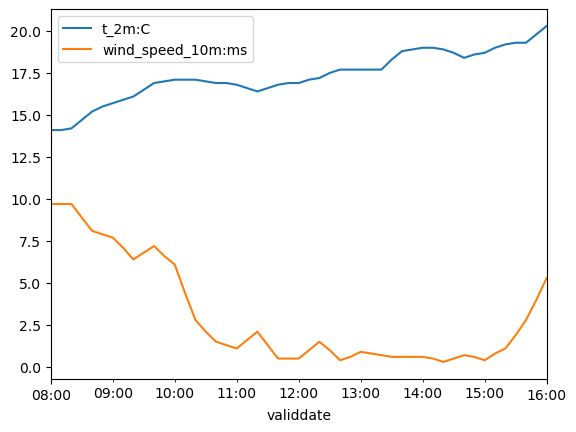

In [69]:
print("Tiefenwinkel",coordinates_ts)
df_ts.reset_index().plot(x="validdate", y=["t_2m:C","wind_speed_10m:ms"])